In [1]:
import pandas as pd
import numpy as np
from google.oauth2 import service_account
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime


pd.set_option('display.max_columns', None)

# authorization
SCOPES = ['https://www.googleapis.com/auth/bigquery','https://www.googleapis.com/auth/spreadsheets']
SERVICE_ACCOUNT_FILE = '/Users/maciej.kunicki/Downloads/elevated-honor-235814-399433d48ae7.json'
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
eobuwie_project_id = 'elevated-honor-235814'

In [2]:
query = "select conversion_id, conversion_name, conversion_platform, conversion_media_source, touchpoint_media_source, conversion_country, touchpoint_type from `elevated-honor-235814.mkunicki.Conversion path appsflyer 09-22 - 15-11-22`"

df = pd.read_gbq(query, project_id=eobuwie_project_id, dialect='standard',credentials=credentials)

Jaki Top-20 ścieżek konwersji użytkownika?

In [3]:
purchases = df[df.conversion_name == 'af_purchase']
purchases['touchpoint_media_source'] = purchases['touchpoint_media_source'].astype(str)
purchases = purchases.groupby(['conversion_id','conversion_media_source'])['touchpoint_media_source'].apply(', '.join).reset_index()
purchases['path'] = purchases['touchpoint_media_source'] + ', ' + purchases['conversion_media_source']

C:\Users\maciej.kunicki\AppData\Local\Temp\ipykernel_16276\987255438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['touchpoint_media_source'] = purchases['touchpoint_media_source'].astype(str)


In [4]:
purchases['path'].value_counts().head(20)

google, google, google, google, google, google, google, google, google                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [5]:
only_clicks = df[df.touchpoint_type == 'mobile_click']
only_clicks['touchpoint_media_source'] = only_clicks['touchpoint_media_source'].astype(str)
only_clicks = only_clicks.groupby(['conversion_id','conversion_media_source', 'conversion_country', 'conversion_platform'])['touchpoint_media_source'].apply(', '.join).reset_index()
only_clicks['path'] = only_clicks['touchpoint_media_source'] + ', ' + only_clicks['conversion_media_source']

C:\Users\maciej.kunicki\AppData\Local\Temp\ipykernel_16276\869008501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_clicks['touchpoint_media_source'] = only_clicks['touchpoint_media_source'].astype(str)


In [6]:
only_clicks['path'].value_counts().head(20)

facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook                                                                                                                                                                                                                                             247572
googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int                                                                                                                                                             62033
modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo                                                                                                                                                                                                                                                                50484
goog

In [7]:
only_clicks['path'].value_counts(normalize=True).head(20).mul(100).round(1).astype(str) + '%'

facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook                                                                                                                                                                                                                                             31.2%
googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int                                                                                                                                                             7.8%
modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo                                                                                                                                                                                                                                                                6.4%
google,

TOP20 ścieżek jest o tyle zaskające, że nie występują tu żadne ścieżki międzykanałowe, wszystkie z nich są monokanałowe i jedno źródło od początku do końca występuje (a przynajmniej tak atrybuje to appsflyer) na ścieżce konwersji.
Za 31% konwersji odpowiada ścieżka 9 x facebook, co daje przypuszczenia, że być może jest to frequency cap ustawiony na facebooku.

______________________________________________________________________________________

Jaka różnica w ścieżkach pomiędzy rynkami?

In [8]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\maciej.kunicki\AppData\Local\Temp\ipykernel_16276\2007425306.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [9]:
only_clicks['conversion_country'].value_counts().head(13)

PL    211568
RO    175339
BG    98319 
GR    59337 
HU    56902 
IT    37669 
HR    32582 
CZ    29120 
UA    26474 
LT    19394 
SK    18280 
DE    15665 
FR    7827  
Name: conversion_country, dtype: int64

In [10]:
print('Polska')
country = only_clicks[only_clicks['conversion_country'] == 'PL']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Polska


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",62331
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",12845
2,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",11748
3,"google, google, google, google, google, google, google, google, google",11432
4,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",10030
5,"criteonew_int, criteonew_int, criteonew_int, criteonew_int, criteonew_int, criteonew_int, criteonew_int, criteonew_int, criteonew_int",4065
6,"facebook, facebook, facebook, facebook, facebook",2283
7,"facebook, facebook, facebook, facebook, facebook, facebook",2265
8,"facebook, facebook, facebook, facebook",2253
9,"facebook, facebook, facebook",2079


In [11]:
print('Rumunia')
country = only_clicks[only_clicks['conversion_country'] == 'RO']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Rumunia


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",52389
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",11005
2,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",10032
3,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",7646
4,"google, google, google, google, google, google, google, google, google",7640
5,"fb, fb, fb, fb, fb, fb, fb, fb, fb",3875
6,"facebook, facebook, facebook, facebook, facebook",2371
7,"facebook, facebook, facebook, facebook, facebook, facebook, facebook",2296
8,"facebook, facebook, facebook, facebook, facebook, facebook",2237
9,"facebook, facebook, facebook, facebook",2193


In [12]:
print('Bułgaria')
country = only_clicks[only_clicks['conversion_country'] == 'BG']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Bułgaria


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",36163
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",6282
2,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",6281
3,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",4445
4,"fb, fb, fb, fb, fb, fb, fb, fb, fb",1790
5,"google, google, google, google, google, google, google, google, google",1509
6,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",1190
7,"facebook, facebook, facebook, facebook, facebook",1099
8,"facebook, facebook, facebook, facebook, facebook, facebook",1075
9,"facebook, facebook, facebook, facebook",1075


In [13]:
print('Grecja')
country = only_clicks[only_clicks['conversion_country'] == 'GR']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Grecja


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",17136
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",6467
2,"google, google, google, google, google, google, google, google, google",3713
3,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",3279
4,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",1915
5,"skroutz, skroutz, skroutz, skroutz, skroutz, skroutz, skroutz, skroutz, skroutz",1715
6,"appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int",701
7,"fb, fb, fb, fb, fb, fb, fb, fb, fb",613
8,"facebook, facebook, facebook, facebook",609
9,"facebook, facebook, facebook, facebook, facebook",606


In [14]:
print('Węgry')
country = only_clicks[only_clicks['conversion_country'] == 'HU']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Węgry


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",25266
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",6573
2,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",2836
3,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",1552
4,"google, google, google, google, google, google, google, google, google",1208
5,"facebook, facebook, facebook, facebook",1061
6,"facebook, facebook, facebook, facebook, facebook",946
7,"facebook, facebook, facebook",908
8,"facebook, facebook, facebook, facebook, facebook, facebook, facebook",850
9,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",845


In [15]:
print('Włochy')
country = only_clicks[only_clicks['conversion_country'] == 'IT']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Włochy


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",16799
1,"google, google, google, google, google, google, google, google, google",2748
2,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",2094
3,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",1070
4,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",990
5,"stileo, stileo, stileo, stileo, stileo, stileo, stileo, stileo, stileo",922
6,"facebook, facebook, facebook, facebook",641
7,"facebook, facebook, facebook",621
8,"facebook, facebook, facebook, facebook, facebook",616
9,"facebook, facebook, facebook, facebook, facebook, facebook",600


In [16]:
print('Chorwacja')
country = only_clicks[only_clicks['conversion_country'] == 'HR']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Chorwacja


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",14336
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",4355
2,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",1317
3,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",918
4,"glami, glami, glami, glami, glami, glami, glami, glami, glami",474
5,"appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int",414
6,"facebook, facebook, facebook, facebook, facebook",409
7,"facebook, facebook, facebook, facebook",406
8,"facebook, facebook, facebook, facebook, facebook, facebook",392
9,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",382


In [17]:
print('Czechy')
country = only_clicks[only_clicks['conversion_country'] == 'CZ']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Czechy


,path,count
0,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",4325
1,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",3684
2,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",3057
3,"google, google, google, google, google, google, google, google, google",2162
4,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",644
5,"glami, glami, glami, glami, glami, glami, glami, glami, glami",640
6,"fb, fb, fb, fb, fb, fb, fb, fb, fb",451
7,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, organic",306
8,"appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int",280
9,"synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise",269


In [18]:
print('Ukraina')
country = only_clicks[only_clicks['conversion_country'] == 'UA']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Ukraina


,path,count
0,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",9480
1,"google, google, google, google, google, google, google, google, google",2265
2,"fb, fb, fb, fb, fb, fb, fb, fb, fb",2010
3,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",1635
4,"ig, ig, ig, ig, ig, ig, ig, ig, ig",956
5,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",506
6,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",397
7,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",260
8,"modivo, modivo, modivo",251
9,"modivo, modivo, modivo, modivo",237


In [19]:
print('Litwa')
country = only_clicks[only_clicks['conversion_country'] == 'LT']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Litwa


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",7004
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",2993
2,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",1070
3,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",741
4,"glami, glami, glami, glami, glami, glami, glami, glami, glami",388
5,"google, google, google, google, google, google, google, google, google",335
6,"facebook, facebook, facebook, facebook, facebook",217
7,"facebook, facebook, facebook, facebook",207
8,"facebook, facebook, facebook, facebook, facebook, facebook, facebook",198
9,"fb, fb, fb, fb, fb, fb, fb, fb, fb",188


In [20]:
print('Słowacja')
country = only_clicks[only_clicks['conversion_country'] == 'SK']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Słowacja


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",4481
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",2783
2,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",1536
3,"google, google, google, google, google, google, google, google, google",958
4,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",628
5,"appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int, appnext_int",357
6,"glami, glami, glami, glami, glami, glami, glami, glami, glami",337
7,"synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise",152
8,"-, -, -, -, -, -, -, -, -",147
9,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, organic",147


In [21]:
print('Niemcy')
country = only_clicks[only_clicks['conversion_country'] == 'DE']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Niemcy


,path,count
0,"google, google, google, google, google, google, google, google, google",2997
1,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",2672
2,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",2025
3,"idealo, idealo, idealo, idealo, idealo, idealo, idealo, idealo, idealo",812
4,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",783
5,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",340
6,"affiliatewindow_int, affiliatewindow_int, affiliatewindow_int, affiliatewindow_int, affiliatewindow_int, affiliatewindow_int, affiliatewindow_int, affiliatewindow_int, affiliatewindow_int",300
7,"synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise",212
8,"facebook, facebook, facebook, facebook, facebook",150
9,"google, google, google, google, google, google, google, google, google, google, google, google, google, google, google, google, google",120


In [22]:
print('Francja')
country = only_clicks[only_clicks['conversion_country'] == 'FR']['path'].value_counts().head(10)
country = pd.DataFrame(country).reset_index()
country.columns = ['path','count']
country

Francja


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",3980
1,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",727
2,"google, google, google, google, google, google, google, google, google",648
3,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",298
4,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",228
5,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",95
6,"facebook, facebook, facebook, facebook, facebook",91
7,"facebook, facebook, facebook, facebook, facebook, facebook",89
8,"facebook, facebook, facebook, facebook, facebook, facebook, facebook",86
9,"facebook, facebook, facebook, facebook",85


In [23]:
only_clicks['steps'] = only_clicks['path'].str.count('\w+')

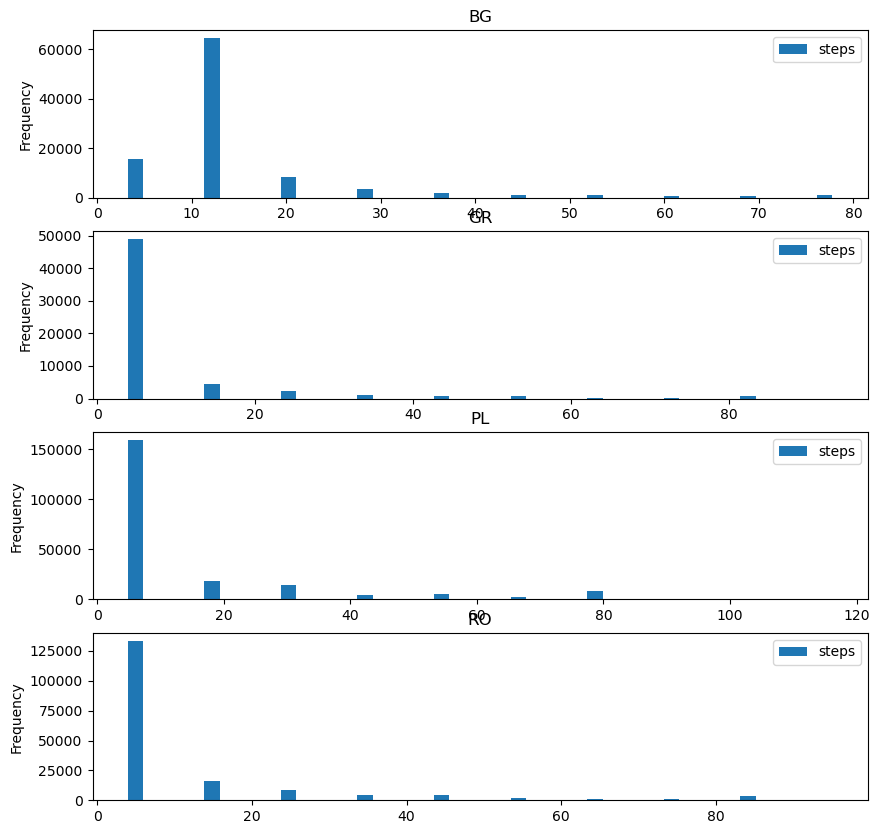

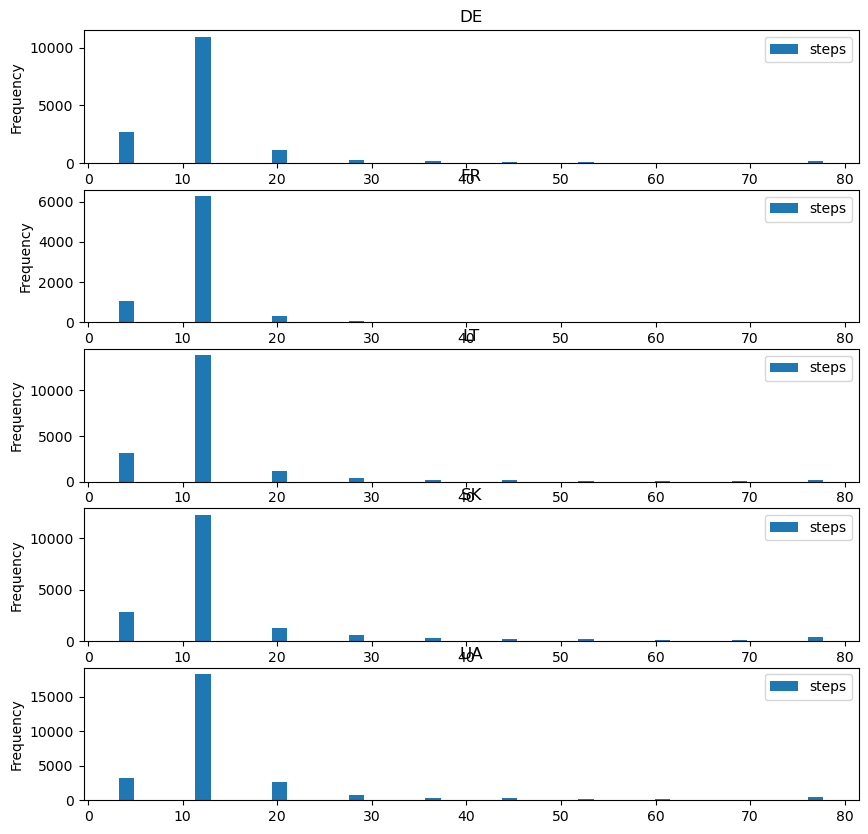

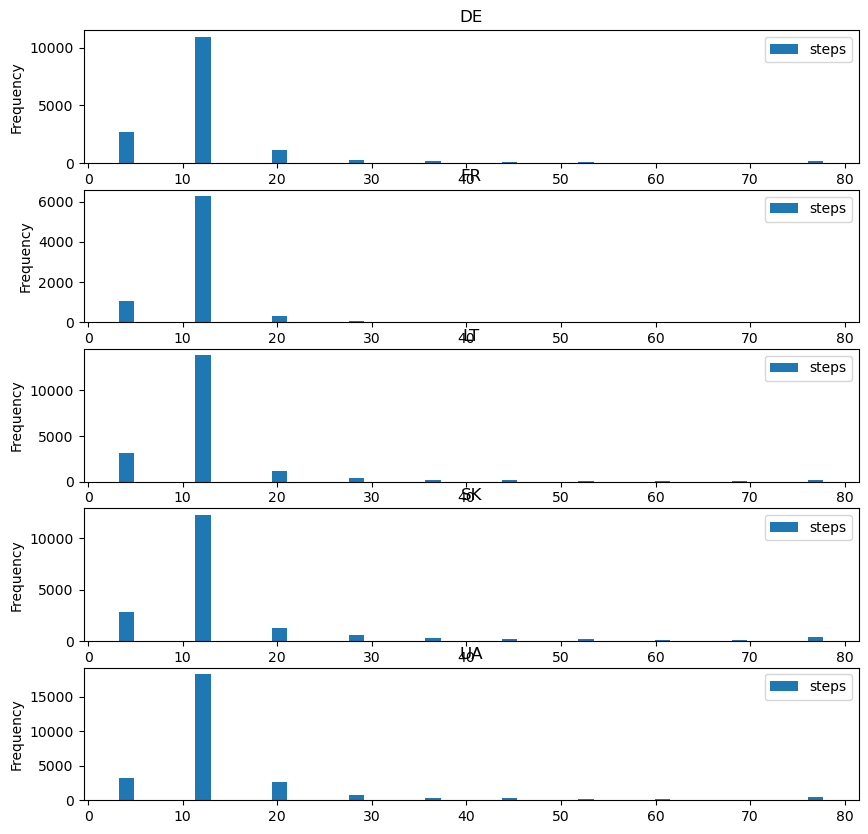

In [24]:
top_countries = ['PL','RO','BG', 'GR']
top_copuntries = only_clicks[only_clicks.conversion_country.isin(top_countries)]

second_tier_countries = ['HU','IT','HR','CZ']
second_tier_countries = only_clicks[only_clicks.conversion_country.isin(second_tier_countries)]

other_countries = ['UA', 'LT','SK','DE','FR']
other_countries = only_clicks[only_clicks.conversion_country.isin(other_countries)]

ax = top_copuntries.plot.hist(column=['steps'], by='conversion_country', figsize=(10,10), rwidth=0.2)
ax2 = other_countries.plot.hist(column=['steps'], by='conversion_country', figsize=(10,10), rwidth=0.2)
ax3 = ax2 = other_countries.plot.hist(column=['steps'], by='conversion_country', figsize=(10,10), rwidth=0.2)

Rynki Polska, Rumunia i Grecja wyróżniają się na tle reszty. Tutaj ludzie potrzebują zdecydowanie mniej kontaktów do zakupu. Hipotezą jest większa obecność i znajomość marki.

___________________________________________________________________________________________________________________________________________

Jaka różnica w ścieżkach pomiędzy platformami?

In [25]:
only_clicks['conversion_platform'].value_counts()

android    618828
ios        175629
Name: conversion_platform, dtype: int64

In [26]:
print('Android')
platform = only_clicks[only_clicks['conversion_platform'] == 'android']['path'].value_counts().head(10)
platform = pd.DataFrame(platform).reset_index()
platform.columns = ['path','count']
platform

Android


,path,count
0,"facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook, facebook",247528
1,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",59319
2,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",27595
3,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",24056
4,"google, google, google, google, google, google, google, google, google",14464
5,"facebook, facebook, facebook, facebook, facebook",9114
6,"facebook, facebook, facebook, facebook",8980
7,"facebook, facebook, facebook, facebook, facebook, facebook",8633
8,"facebook, facebook, facebook, facebook, facebook, facebook, facebook",8464
9,"facebook, facebook, facebook",8317


In [27]:
print('iOS')
platform = only_clicks[only_clicks['conversion_platform'] == 'ios']['path'].value_counts().head(10)
platform = pd.DataFrame(platform).reset_index()
platform.columns = ['path','count']
platform

iOS


,path,count
0,"modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo, modivo",26428
1,"google, google, google, google, google, google, google, google, google",23589
2,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",9436
3,"fb, fb, fb, fb, fb, fb, fb, fb, fb",5685
4,"google, google, google, google, google, google, google, google, google, google, google, google, google, google, google, google, google",3258
5,"ig, ig, ig, ig, ig, ig, ig, ig, ig",3226
6,"restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted, restricted",2862
7,"googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int, googleadwords_int",2714
8,"synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise, synerise",2685
9,"Apple Search Ads, Apple Search Ads, Apple Search Ads, Apple Search Ads, Apple Search Ads, Apple Search Ads, Apple Search Ads, Apple Search Ads, Apple Search Ads",2306


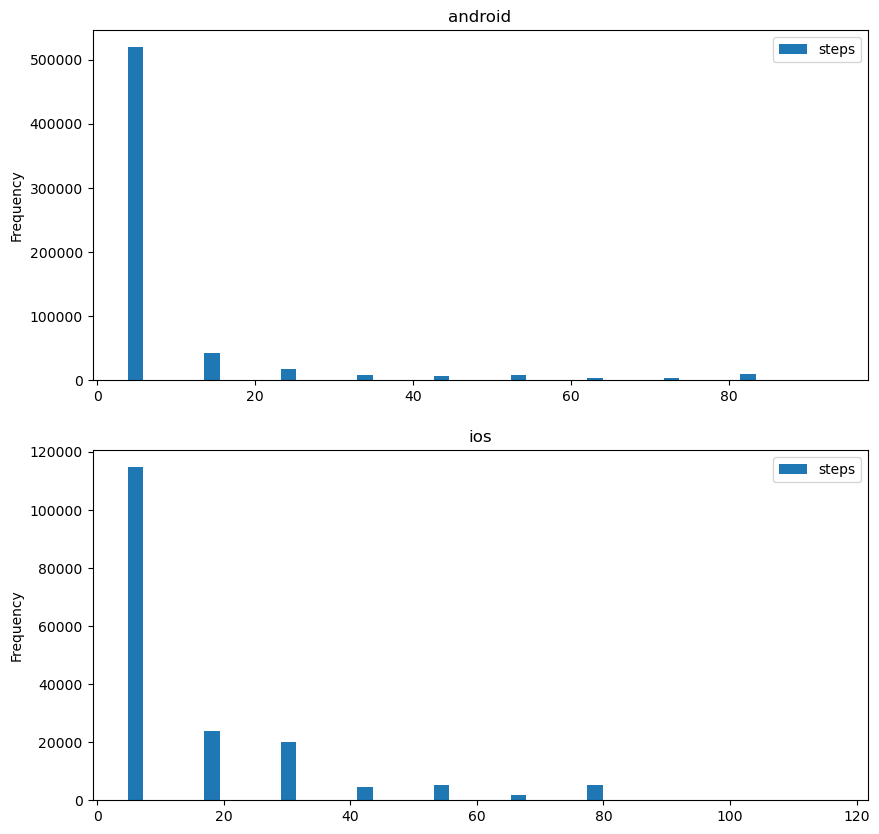

In [28]:
platforms = ['android','ios']
platforms = only_clicks[only_clicks.conversion_platform.isin(platforms)]
ax = platforms.plot.hist(column=['steps'], by='conversion_platform', figsize=(10,10), rwidth=0.2)

In [29]:
#odrzucenie odstajacych
only_clicks = only_clicks[only_clicks['steps'] < 100]
android = only_clicks[only_clicks['conversion_platform'] == 'android']
ios = only_clicks[only_clicks['conversion_platform'] == 'ios']

In [30]:
print('Android:')
print('mean :', android['steps'].mean())
print('median :', android['steps'].median())

print('iOS:')
print('mean :', ios['steps'].mean())
print('median :', ios['steps'].median())

Android:
mean : 12.331849883974222
median : 9.0
iOS:
mean : 16.591814423832464
median : 9.0


In [31]:
android['steps'].value_counts(normalize=True)[:11].mul(100).round(1).astype(str) + '%'

9     67.5%
17    5.5% 
5     2.6% 
7     2.6% 
4     2.4% 
6     2.4% 
25    2.3% 
3     2.3% 
8     2.3% 
81    1.7% 
2     1.6% 
Name: steps, dtype: object

In [32]:
ios['steps'].value_counts(normalize=True)[:11].mul(100).round(1).astype(str) + '%'

9     49.1%
17    10.0%
25    5.8% 
33    3.3% 
7     2.4% 
81    2.3% 
41    2.2% 
5     2.2% 
4     2.1% 
3     2.0% 
8     1.9% 
Name: steps, dtype: object

Ścieżka na ios jest nieco dłuższa, niż na androidzie (średnio o 4 kontakty). Może być to jednak związane z naturą źródła i jego współczynnikiem konwersji, na androidzie dominuje facebook (który odpowiada za ponad 60% ścieżek konwersji).

_____________________________________________________________________________________________________________________________________

Ile dni przechodzi od install to purchase? Rozłożyć czasowo.

In [33]:
query = "SELECT appsflyer_id, conversion_time, conversion_name, touchpoint_time, touchpoint_type  FROM `elevated-honor-235814.mkunicki.Conversion path appsflyer 09-22 - 15-11-22`"

df2 = pd.read_gbq(query, project_id=eobuwie_project_id, dialect='standard',credentials=credentials)

In [34]:
purchases = df2[df2.conversion_name == 'af_purchase'].reset_index()
purchases.drop(['index','conversion_name','touchpoint_time','touchpoint_type'], inplace=True, axis=1)
purchases = purchases.rename(columns={'conversion_time' : 'purchase_time'})

installs = df2[df2.conversion_name == 'install'].reset_index()
installs.drop(['index','conversion_name','touchpoint_time','touchpoint_type'], inplace=True, axis=1)
installs = installs.rename(columns={'conversion_time' : 'install_time'})

In [35]:
appsflyer = pd.merge(installs,purchases, on='appsflyer_id')

In [36]:
purchase_day = []
for i in appsflyer['purchase_time']:
    day = i.split(' ')[0]
    day = datetime.strptime(day,'%Y-%m-%d').date()
    purchase_day.append(day)

appsflyer['purchase_day'] = purchase_day

In [37]:
install_day = []
for i in appsflyer['install_time']:
    day = i.split(' ')[0]
    day = datetime.strptime(day,'%Y-%m-%d').date()
    install_day.append(day)

appsflyer['install_day'] = install_day

In [38]:
appsflyer['day_difference'] = appsflyer['purchase_day'] - appsflyer['install_day']
appsflyer['day_difference'] = appsflyer['day_difference'].dt.days
appsflyer_u = appsflyer.drop_duplicates(keep='first')

<AxesSubplot:>

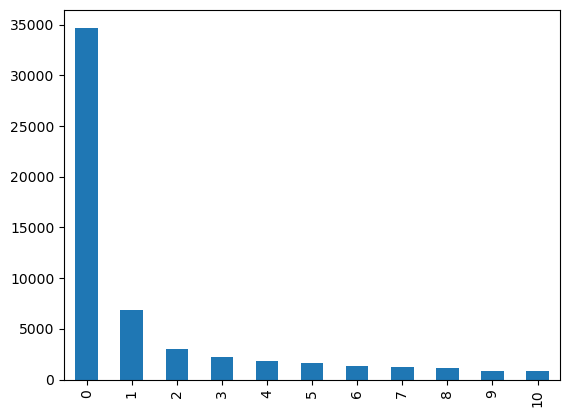

In [39]:
plt.figure()
appsflyer_u['day_difference'].value_counts()[:11].plot(kind='bar')

In [40]:
appsflyer_u['day_difference'].value_counts()[:11]

0     34717
1     6823 
2     3050 
3     2230 
4     1828 
5     1611 
6     1368 
7     1266 
8     1137 
9     862  
10    842  
Name: day_difference, dtype: int64

In [41]:
appsflyer_u['day_difference'].value_counts(normalize=True)[:11].mul(100).round(1).astype(str) + '%'

0     48.0%
1     9.4% 
2     4.2% 
3     3.1% 
4     2.5% 
5     2.2% 
6     1.9% 
7     1.7% 
8     1.6% 
9     1.2% 
10    1.2% 
Name: day_difference, dtype: object

48% użytkowników robi zakup tego samego dnia, którego następuje instalacja, a 65.7% użytkowników w ciągu pierwszych 3 dni. Ilość użytkowników proporcjonalnie spada każdego kolejnego dnia i ma długi ogon (pojedyńcze jednostki po nawet 80 dniach).

_____________________________________________________________________________________________________________________________________

Ile kontaktów od wejścia + install do zakupu? wejścia do zakupu?

In [42]:
purchases = df2[df2.conversion_name == 'af_purchase'].reset_index()
purchase_steps = pd.DataFrame(purchases.groupby('appsflyer_id').count().reset_index())
purchase_steps = purchase_steps[['appsflyer_id','index']]
purchase_steps = purchase_steps.rename(columns={'index' : 'purchase_steps'})
#odrzucenie pojedynczych odstajacych wysokich wyników
purchase_steps = purchase_steps[purchase_steps['purchase_steps'] < 100]

In [43]:
print('Od poczatku do zakupu:')
print('mean :', purchase_steps['purchase_steps'].mean())
print('median :', purchase_steps['purchase_steps'].median())

Od poczatku do zakupu:
mean : 24.578184738955823
median : 16.0


<AxesSubplot:>

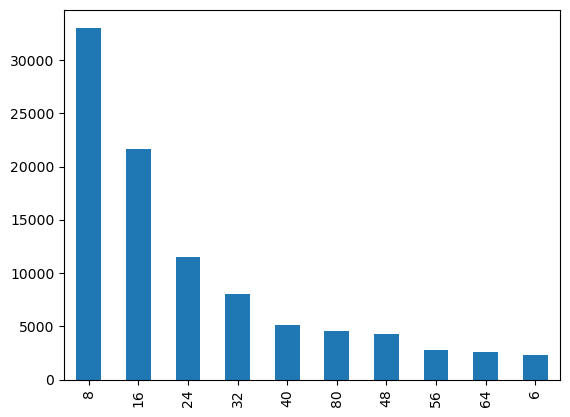

In [44]:
plt.figure()
purchase_steps['purchase_steps'].value_counts()[:10].plot(kind='bar')

In [45]:
installs = df2[df2.conversion_name == 'install'].reset_index()
installs_steps = pd.DataFrame(installs.groupby('appsflyer_id').count().reset_index())
installs_steps = installs_steps[['appsflyer_id','index']]
installs_steps = installs_steps.rename(columns={'index' : 'install_steps'})
installs_steps = installs_steps[installs_steps['install_steps'] < 100]

In [46]:
print('Od poczatku do instalacji:')
print('mean :', installs_steps['install_steps'].mean())
print('median :', installs_steps['install_steps'].median())

Od poczatku do instalacji:
mean : 8.71127471650438
median : 8.0


<AxesSubplot:>

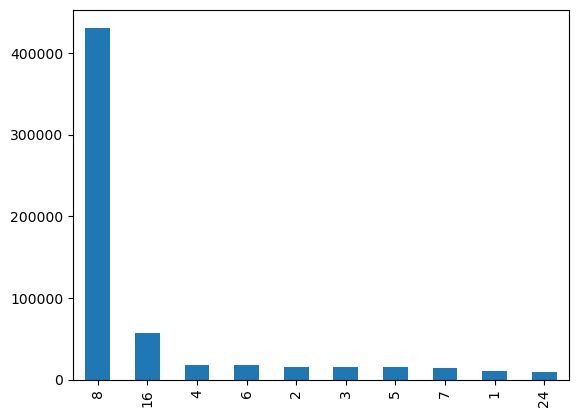

In [47]:
plt.figure()
installs_steps['install_steps'].value_counts()[:10].plot(kind='bar')

In [48]:
steps = pd.merge(installs_steps, purchase_steps, how='right', on='appsflyer_id')
steps = steps.dropna()

In [49]:
steps['purchase_to_install'] =  steps['purchase_steps'] - steps['install_steps']

In [50]:
print('Od instalacji do zakupu:')
print('mean :', steps['purchase_to_install'].mean())
print('median :', steps['purchase_to_install'].median())

Od instalacji do zakupu:
mean : 8.074396972150565
median : 0.0


<AxesSubplot:>

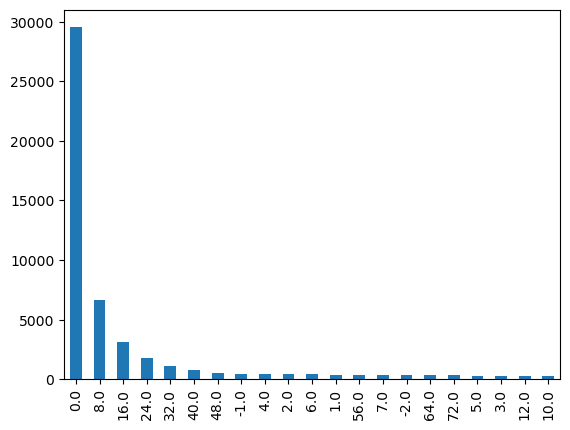

In [51]:
plt.figure()
steps['purchase_to_install'].value_counts()[:10].plot(kind='bar')

In [52]:
print(purchase_steps.shape)
print(installs_steps.shape)
print(steps.shape)

(124500, 2)
(618969, 2)
(53107, 4)


In [53]:
purchases_clicks = purchases[purchases.touchpoint_type == 'mobile_click']
purchase_steps_clicks = pd.DataFrame(purchases_clicks.groupby('appsflyer_id').count().reset_index())
purchase_steps_clicks = purchase_steps_clicks[['appsflyer_id','index']]
purchase_steps_clicks = purchase_steps_clicks.rename(columns={'index' : 'purchase_steps'})
purchase_steps_clicks = purchase_steps_clicks[purchase_steps_clicks['purchase_steps'] < 100]
print('Od początku do zakupu (tylko kliknięcia):')
print('mean :', purchase_steps_clicks['purchase_steps'].mean())
print('median :', purchase_steps_clicks['purchase_steps'].median())

Od początku do zakupu (tylko kliknięcia):
mean : 23.881249674383064
median : 16.0


In [54]:
installs_clicks = installs[installs.touchpoint_type == 'mobile_click']
install_steps_clicks = pd.DataFrame(installs_clicks.groupby('appsflyer_id').count().reset_index())
install_steps_clicks = install_steps_clicks[['appsflyer_id','index']]
install_steps_clicks = install_steps_clicks.rename(columns={'index' : 'install_steps'})
install_steps_clicks = install_steps_clicks[install_steps_clicks['install_steps'] < 100]
print('Od początku do instalacji (tylko kliknięcia):')
print('mean :', install_steps_clicks['install_steps'].mean())
print('median :', install_steps_clicks['install_steps'].median())

Od początku do instalacji (tylko kliknięcia):
mean : 7.949321681951894
median : 8.0


In [55]:
steps_clicks = pd.merge(install_steps_clicks, purchase_steps_clicks, how='right', on='appsflyer_id')
steps_clicks = steps_clicks.dropna()
steps_clicks['purchase_to_install'] =  steps_clicks['purchase_steps'] - steps_clicks['install_steps']
print('Od instalacji do zakupu (tylko kliknięcia):')
print('mean :', steps_clicks['purchase_to_install'].mean())
print('median :', steps_clicks['purchase_to_install'].median())

Od instalacji do zakupu (tylko kliknięcia):
mean : 8.08101577565577
median : 0.0


In [56]:
print(purchase_steps_clicks.shape)
print(install_steps_clicks.shape)
print(steps_clicks.shape)

(115166, 2)
(577900, 2)
(43041, 4)


Naturalnie najdłużej trwa ścieżka od początku do zakupu, średnio 24 kontakty, natomiast od początku do instalacji średnio 8 kontaktów. To tyle samo ile średnio kontaktów użytkownicy robią od instalacji do zakupu. 

Mimo, iż może wskazywać to na długi proces aktywacji (średnio 8 kontaktów między instalacja, a zakupem) to większość użytkowników robi zakup zaraz po instalacji (brak interakcji pomiędzy).